<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/LogReturn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as web
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [10]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2000-11-01', end='2021-03-08')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-11-01,0.372768,0.347098,0.347098,0.366071,575366400.0,0.315320
2000-11-02,0.400670,0.376116,0.377232,0.398438,590693600.0,0.343200
2000-11-03,0.410714,0.391741,0.410714,0.397321,515821600.0,0.342238
2000-11-06,0.404018,0.372768,0.400670,0.382813,393478400.0,0.329741
2000-11-07,0.389509,0.371652,0.383929,0.380580,301963200.0,0.327818
...,...,...,...,...,...,...
2021-03-02,128.720001,125.010002,128.410004,125.120003,102015300.0,125.120003
2021-03-03,125.709999,121.839996,124.809998,122.059998,112430400.0,122.059998
2021-03-04,123.599998,118.620003,121.750000,120.129997,177275300.0,120.129997


In [12]:
#log daily return
df['LogReturn'] = np.log(df['Adj Close']).shift(+1) - np.log(df['Adj Close'])
df

,High,Low,Open,Close,Volume,Adj Close,LogReturn
Date,,,,,,,
2000-11-01,0.372768,0.347098,0.347098,0.366071,575366400.0,0.315320,NaN
2000-11-02,0.400670,0.376116,0.377232,0.398438,590693600.0,0.343200,-0.084725
2000-11-03,0.410714,0.391741,0.410714,0.397321,515821600.0,0.342238,0.002808
2000-11-06,0.404018,0.372768,0.400670,0.382813,393478400.0,0.329741,0.037198
2000-11-07,0.389509,0.371652,0.383929,0.380580,301963200.0,0.327818,0.005850
...,...,...,...,...,...,...,...
2021-03-02,128.720001,125.010002,128.410004,125.120003,102015300.0,125.120003,0.021115
2021-03-03,125.709999,121.839996,124.809998,122.059998,112430400.0,122.059998,0.024761
2021-03-04,123.599998,118.620003,121.750000,120.129997,177275300.0,120.129997,0.015938


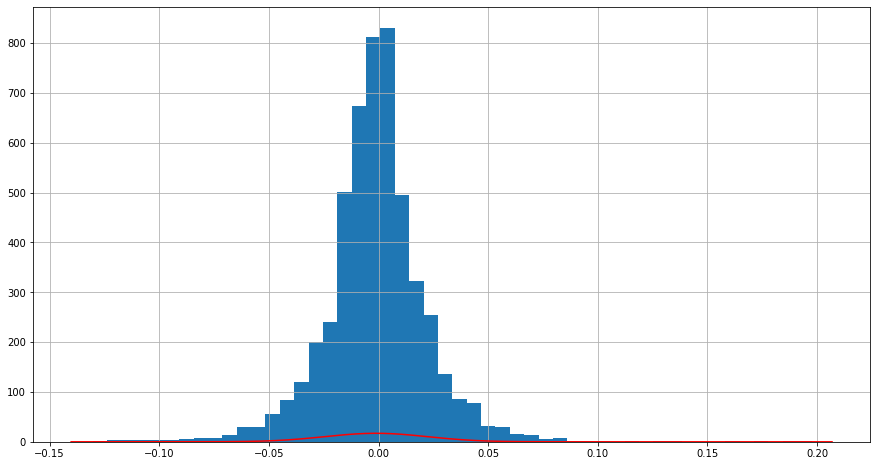

In [13]:
# Plot a histogram to show the distribution of log return 
from scipy.stats import norm
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(df['LogReturn'].min()-0.01, df['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

df['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [14]:
# probability that the stock price will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.018315870926034664


In [15]:
# Value at risk(VaR)
VaR = norm.ppf(0.01, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.05552763771875806


In [16]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.03959949972531118
95% quantile  0.03728876649557439
